## IBM

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from collections import deque
import random
from sklearn.preprocessing import StandardScaler
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import deque
import random
from sklearn.preprocessing import StandardScaler

In [282]:
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''

    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch / step_size))

    return LearningRateScheduler(schedule)


In [283]:
SEQ_LEN = 14 # how long of a preceeding sequence to collect for RNN
FUTURE_PERIOD_PREDICT = 1  # how far into the future are we trying to predict?

In [284]:
all_variables=["Date","Low","High", "Open", "AdjClose","Volume","RSI","TSF","SPD_OPEN/CLOSE","SPD_HIGH/LOW",
           "macd","OBV","OBV_EMA", "EMA","upperband","middleband","lowerband","MOM","STOCH_K", "STOCH_D","WILLR", "TEMA", "direction"]

In [285]:
IBM=pd.read_csv("IBM.csv", usecols=all_variables) #usecols=all_variables)

In [286]:
#set date as datetime
IBM["Date"]=pd.to_datetime(IBM["Date"])
IBM

,Date,AdjClose,Open,High,Low,Volume,SPD_OPEN/CLOSE,SPD_HIGH/LOW,macd,RSI,...,WILLR,STOCH_K,STOCH_D,EMA,TEMA,upperband,middleband,lowerband,MOM,direction
0,2000-02-22,63.637089,107.074570,108.448853,103.967499,8006921,-0.956024,4.481354,-0.335971,45.072478,...,-138.613872,1.097119,27.644444,64.640712,2.577548e+05,69.541763,66.165284,62.788806,62.637089,-1
1,2000-02-23,62.347153,105.640533,105.640533,103.728493,7777324,-1.673034,1.912040,-0.600809,41.831586,...,-118.918841,-24.128062,1.683852,63.493932,2.440705e+05,69.208440,65.820695,62.432949,61.347153,-1
2,2000-02-24,63.350410,104.027245,106.118546,103.429733,9531152,1.613288,2.688813,-0.721425,45.135822,...,-100.000000,-19.177571,-14.069505,63.422171,2.432307e+05,68.953792,65.588649,62.223506,62.350410,1
3,2000-02-25,61.917152,105.043022,105.043022,100.322655,10786561,-1.792541,4.720367,-0.922037,41.508260,...,-118.987319,-12.635387,-18.647007,62.669662,2.345398e+05,69.008318,65.353122,61.697926,60.917152,-1
4,2000-02-28,59.910568,100.023903,101.816444,99.366638,8869975,-0.119507,2.449806,-1.228774,37.022123,...,-115.094355,-11.360558,-14.391172,61.290115,2.191494e+05,69.440112,65.110676,60.781240,58.910568,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,2022-02-07,135.606552,137.449997,137.820007,136.270004,3759000,-0.209992,1.550003,1.741004,60.715850,...,-16.339192,85.397707,87.672840,135.488645,2.432523e+06,137.241213,132.438050,127.634886,134.606552,1
5527,2022-02-08,135.389175,137.229996,137.520004,135.779999,4181800,-0.209992,1.740005,1.742613,59.964191,...,-18.614277,82.592171,85.868432,135.438910,2.429826e+06,137.497783,132.541095,127.584406,134.389175,-1
5528,2022-02-09,136.149994,137.839996,138.350006,136.830002,5393500,-0.050003,1.520004,1.784707,61.749090,...,-10.651630,84.798300,84.262726,135.794452,2.449155e+06,137.851112,132.670958,127.490804,135.149994,1
5529,2022-02-10,133.520004,135.470001,136.559998,133.169998,5978600,-1.949997,3.390000,1.587549,52.959537,...,-54.808644,71.975150,79.788540,134.657228,2.387688e+06,137.931064,132.777218,127.623371,132.520004,-1


In [287]:
#set index to date
IBM.set_index("Date", inplace=True)
IBM

,AdjClose,Open,High,Low,Volume,SPD_OPEN/CLOSE,SPD_HIGH/LOW,macd,RSI,OBV,...,WILLR,STOCH_K,STOCH_D,EMA,TEMA,upperband,middleband,lowerband,MOM,direction
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-22,63.637089,107.074570,108.448853,103.967499,8006921,-0.956024,4.481354,-0.335971,45.072478,-16825325,...,-138.613872,1.097119,27.644444,64.640712,2.577548e+05,69.541763,66.165284,62.788806,62.637089,-1
2000-02-23,62.347153,105.640533,105.640533,103.728493,7777324,-1.673034,1.912040,-0.600809,41.831586,-24602649,...,-118.918841,-24.128062,1.683852,63.493932,2.440705e+05,69.208440,65.820695,62.432949,61.347153,-1
2000-02-24,63.350410,104.027245,106.118546,103.429733,9531152,1.613288,2.688813,-0.721425,45.135822,-15071497,...,-100.000000,-19.177571,-14.069505,63.422171,2.432307e+05,68.953792,65.588649,62.223506,62.350410,1
2000-02-25,61.917152,105.043022,105.043022,100.322655,10786561,-1.792541,4.720367,-0.922037,41.508260,-25858058,...,-118.987319,-12.635387,-18.647007,62.669662,2.345398e+05,69.008318,65.353122,61.697926,60.917152,-1
2000-02-28,59.910568,100.023903,101.816444,99.366638,8869975,-0.119507,2.449806,-1.228774,37.022123,-34728033,...,-115.094355,-11.360558,-14.391172,61.290115,2.191494e+05,69.440112,65.110676,60.781240,58.910568,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,135.606552,137.449997,137.820007,136.270004,3759000,-0.209992,1.550003,1.741004,60.715850,259409442,...,-16.339192,85.397707,87.672840,135.488645,2.432523e+06,137.241213,132.438050,127.634886,134.606552,1
2022-02-08,135.389175,137.229996,137.520004,135.779999,4181800,-0.209992,1.740005,1.742613,59.964191,255227642,...,-18.614277,82.592171,85.868432,135.438910,2.429826e+06,137.497783,132.541095,127.584406,134.389175,-1
2022-02-09,136.149994,137.839996,138.350006,136.830002,5393500,-0.050003,1.520004,1.784707,61.749090,260621142,...,-10.651630,84.798300,84.262726,135.794452,2.449155e+06,137.851112,132.670958,127.490804,135.149994,1


In [288]:
IBM_2=IBM.copy()

In [289]:
STOCK_TO_PREDICT = "IBM"

In [290]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [291]:
y = IBM['direction']


In [292]:
#exclude direction column
X = IBM.drop(['direction', "AdjClose"], axis=1)


In [293]:
"""X[col]=(X[col].values-np.min([col]))/(np.max(X[col])-np.min(X[col]))
    preprocessing.scale(X[col].values)
X.dropna(inplace=True)"""
for col in X.columns:
        X[col]=(X[col].values-np.min(X[col]))/(np.max(X[col])-np.min(X[col]))
        preprocessing.scale(X[col].values)


In [294]:
X_train_IBM, X_valid_IBM, y_train_IBM, y_valid_IBM = train_test_split(X, y, test_size = 0.3, shuffle=False)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_IBM = RandomForestClassifier(n_estimators=100,
                            n_jobs=-1,
                            random_state=42)

rf_IBM.fit(X_train_IBM, y_train_IBM)
y_pred_IBM = rf_IBM.predict(X_valid_IBM)

print('Score Train: ', rf_IBM.score(X_train_IBM, y_train_IBM))
print('Score Test: ', rf_IBM.score(X_valid_IBM, y_valid_IBM))

In [296]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_IBM, y_pred_IBM))


              precision    recall  f1-score   support

          -1       0.84      0.89      0.86       788
           1       0.89      0.84      0.87       872

    accuracy                           0.86      1660
   macro avg       0.86      0.86      0.86      1660
weighted avg       0.86      0.86      0.86      1660



In [297]:
feature_importances_IBM = pd.DataFrame(rf_IBM.feature_importances_, index=X_train_IBM.columns, columns=['importance']).sort_values(
    'importance', ascending=False)
feature_importances_IBM

,importance
SPD_OPEN/CLOSE,0.406984
WILLR,0.132885
RSI,0.052159
STOCH_D,0.047582
STOCH_K,0.046886
macd,0.035502
SPD_HIGH/LOW,0.031781
Volume,0.029152
OBV,0.023483
OBV_EMA,0.022071


<AxesSubplot:>

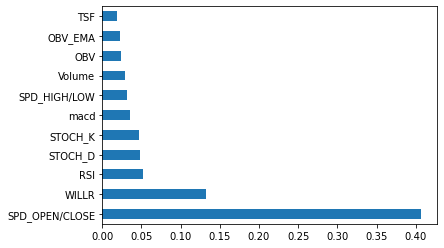

In [298]:
feat_importances_IBM = pd.Series(rf_IBM.feature_importances_, index=X_train_IBM.columns)
feat_importances_IBM.nlargest(11).plot(kind="barh")

In [299]:
#add columns to IBM_2 from all variables
IBM_2=IBM_2[["AdjClose","SPD_OPEN/CLOSE","WILLR","RSI","direction"]]
train_val_size = int(0.70 * len(IBM_2))
IBM_train= IBM_2.iloc[:train_val_size]
IBM_test= IBM_2.iloc[train_val_size:]


In [300]:
IBM_train

,AdjClose,SPD_OPEN/CLOSE,WILLR,RSI,direction
Date,,,,,
2000-02-22,63.637089,-0.956024,-138.613872,45.072478,-1
2000-02-23,62.347153,-1.673034,-118.918841,41.831586,-1
2000-02-24,63.350410,1.613288,-100.000000,45.135822,1
2000-02-25,61.917152,-1.792541,-118.987319,41.508260,-1
2000-02-28,59.910568,-0.119507,-115.094355,37.022123,-1
...,...,...,...,...,...
2015-07-07,117.290474,0.057373,-83.249566,43.763610,1
2015-07-08,115.982536,-0.803055,-114.070274,38.378467,-1
2015-07-09,116.473015,-1.424469,-102.512555,41.295703,1


In [301]:
from sklearn import preprocessing
from collections import deque
import random
from sklearn.preprocessing import StandardScaler
#pd.options.mode.chained_assignment = None
def preprocess_feature_df(df):

    for col in df.columns:
        if col != 'direction':
            df[col]=(df[col].values-np.min(df[col]))/(np.max(df[col])-np.min(df[col]))
            df.dropna(inplace=True)
            preprocessing.scale(df[col].values)
    df=df.dropna()
    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
            sequential_data.append([np.array(prev_days), i[-1]])
    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    return np.array(X), np.array(y)  # return X and y...and make X a numpy array!


In [302]:
train_x_IBM, train_y_IBM = preprocess_feature_df(IBM_train)
validation_x_IBM, validation_y_IBM = preprocess_feature_df(IBM_test)

<ipython-input-301-ca67718c7890>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=(df[col].values-np.min(df[col]))/(np.max(df[col])-np.min(df[col]))
<ipython-input-301-ca67718c7890>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-301-ca67718c7890>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [303]:
train_y_IBM=np.where(train_y_IBM==1,1,0)
validation_y_IBM=np.where(validation_y_IBM==1,1,0)

In [304]:
validation_y_IBM

array([1, 0, 0, ..., 1, 0, 0])

In [305]:
import time
EPOCHS = 30
BATCH_SIZE = 24
NAME = f"{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}-IBM"

In [306]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, BatchNormalization, GRU
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.layers import TimeDistributed

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, TensorBoard

In [307]:
from tensorflow.compat.v1.keras.layers import CuDNNLSTM


In [311]:
model_IBM = Sequential()
model_IBM.add(CuDNNLSTM(256, input_shape=train_x_IBM.shape[1:], recurrent_regularizer=regularizers.l2(0.01),
               return_sequences=True))  #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_IBM.add(Dropout(0.2))
model_IBM.add(BatchNormalization())

model_IBM.add(CuDNNLSTM(128, input_shape=train_x_IBM.shape[1:], kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01),
               ))  #recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_IBM.add(Dropout(0.2))
model_IBM.add(BatchNormalization())


model_IBM.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-6)
# Compile model_IBM
model_IBM.compile(
    loss='binary_crossentropy',
    optimizer= opt,
    metrics=['accuracy']
)

In [312]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
from keras.callbacks import LearningRateScheduler

filepath = "KERAS_IBM-{epoch:02d}-{val_accuracy:.3f}"  # unique file name that will include the epoch and the validation acc for that epoch
checkpoint = ModelCheckpoint(
    "models/{}.model".format(filepath, monitor='val_acc', verbose=1, mode='max', save_best_only=True, ),
    period=20)  # saves only the best ones


def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''

    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch / step_size))

    return LearningRateScheduler(schedule)


lr_sched = step_decay_schedule(initial_lr=1e-2, decay_factor=0.75, step_size=2)
history_IBM = model_IBM.fit(
    train_x_IBM, train_y_IBM,
    batch_size=24,
    epochs=1000,
    validation_data=(validation_x_IBM, validation_y_IBM),
callbacks=[es])
#model.save("models/{}".format(NAME))

Epoch 1/1000
161/161 [==============================] - 8s 36ms/step - loss: 3.5026 - accuracy: 0.5109 - val_loss: 1.7279 - val_accuracy: 0.5258
Epoch 2/1000
161/161 [==============================] - 5s 31ms/step - loss: 1.3442 - accuracy: 0.5381 - val_loss: 1.1220 - val_accuracy: 0.5258
Epoch 3/1000
161/161 [==============================] - 5s 31ms/step - loss: 0.9542 - accuracy: 0.5643 - val_loss: 0.8255 - val_accuracy: 0.6169
Epoch 4/1000
161/161 [==============================] - 5s 31ms/step - loss: 0.7954 - accuracy: 0.6252 - val_loss: 0.8737 - val_accuracy: 0.5495
Epoch 5/1000
161/161 [==============================] - 5s 33ms/step - loss: 0.6356 - accuracy: 0.7506 - val_loss: 0.6060 - val_accuracy: 0.7863
Epoch 6/1000
161/161 [==============================] - 5s 31ms/step - loss: 0.5458 - accuracy: 0.8160 - val_loss: 0.5075 - val_accuracy: 0.8087
Epoch 7/1000
161/161 [==============================] - 5s 32ms/step - loss: 0.4660 - accuracy: 0.8401 - val_loss: 0.4086 - val_ac

161/161 [==============================] - 5s 33ms/step - loss: 0.1404 - accuracy: 0.9552 - val_loss: 0.1887 - val_accuracy: 0.9356
Epoch 57/1000
161/161 [==============================] - 5s 34ms/step - loss: 0.1406 - accuracy: 0.9567 - val_loss: 0.2364 - val_accuracy: 0.9211
Epoch 58/1000
161/161 [==============================] - 5s 32ms/step - loss: 0.1411 - accuracy: 0.9541 - val_loss: 0.1873 - val_accuracy: 0.9411
Epoch 59/1000
161/161 [==============================] - 5s 32ms/step - loss: 0.1311 - accuracy: 0.9567 - val_loss: 0.1620 - val_accuracy: 0.9514
Epoch 60/1000
161/161 [==============================] - 5s 32ms/step - loss: 0.1460 - accuracy: 0.9513 - val_loss: 0.2707 - val_accuracy: 0.9010
Epoch 61/1000
161/161 [==============================] - 5s 32ms/step - loss: 0.1306 - accuracy: 0.9567 - val_loss: 0.1145 - val_accuracy: 0.9636
Epoch 62/1000
161/161 [==============================] - 5s 32ms/step - loss: 0.1341 - accuracy: 0.9559 - val_loss: 0.1556 - val_accuracy:

161/161 [==============================] - 5s 34ms/step - loss: 0.1129 - accuracy: 0.9637 - val_loss: 0.1742 - val_accuracy: 0.9435
Epoch 113/1000
161/161 [==============================] - 5s 33ms/step - loss: 0.0993 - accuracy: 0.9666 - val_loss: 0.2046 - val_accuracy: 0.9326
Epoch 114/1000
161/161 [==============================] - 5s 34ms/step - loss: 0.1052 - accuracy: 0.9658 - val_loss: 0.0857 - val_accuracy: 0.9781
Epoch 115/1000
161/161 [==============================] - 6s 35ms/step - loss: 0.1111 - accuracy: 0.9647 - val_loss: 0.1717 - val_accuracy: 0.9393
Epoch 116/1000
161/161 [==============================] - 5s 33ms/step - loss: 0.1190 - accuracy: 0.9609 - val_loss: 0.0875 - val_accuracy: 0.9763
Epoch 117/1000
161/161 [==============================] - 5s 33ms/step - loss: 0.1242 - accuracy: 0.9565 - val_loss: 0.2398 - val_accuracy: 0.9107
Epoch 118/1000
161/161 [==============================] - 5s 34ms/step - loss: 0.1236 - accuracy: 0.9598 - val_loss: 0.1115 - val_acc

In [313]:
#divide IBM test into x and y

predicted_IBM = model_IBM.predict(validation_x_IBM)
#print accuracy on test set model IBM
predicted_IBM_train = model_IBM.predict(train_x_IBM)

In [419]:
score_IBM = model_IBM.evaluate(validation_x_IBM, validation_y_IBM, verbose = 0) 

print('Test loss:', score_IBM[0]) 
print('Test accuracy:', score_IBM[1])

Test loss: 0.2966996729373932
Test accuracy: 0.9010322093963623


In [314]:
predicted_IBM_out=[]
for i in predicted_IBM:
    if i>=0.5:
        predicted_IBM_out.append(1)
    elif i<0.5:
        predicted_IBM_out.append(-1)

predicted_IBM_train=[]
for i in predicted_IBM_train:
    if i >= 0.5:
        predicted_IBM_train.append(1)
    elif i < 0.5:
        predicted_IBM_train.append(-1) 

In [315]:
predicted_ibm_test=pd.DataFrame(predicted_IBM_out)
predicted_ibm_train_out=pd.DataFrame(predicted_IBM_train)
predicted_ibm_test.to_csv("test_LSTM_IBM.csv")
predicted_ibm_train_out.to_csv("train_LSTM_IBM.csv")

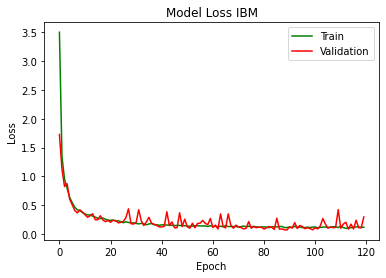

In [317]:
plt.plot(history_IBM.history['loss'], color="green")
plt.plot(history_IBM.history['val_loss'], color="red")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.title("Model Loss IBM")
plt.savefig("MODELS_PNG/LOSS_IBM.png")

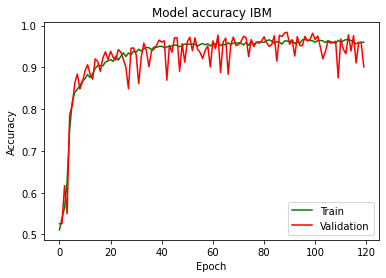

In [319]:
plt.plot(history_IBM.history["accuracy"], color="green")
plt.plot(history_IBM.history["val_accuracy"], color="red")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.title("Model accuracy IBM")
plt.savefig("MODELS_PNG/Accuracy_IBM.png")


# NASDAQ

In [320]:
all_variables_NASDAQ=["Date","Low","High", "Open", "AdjClose","Volume","RSI","TSF","SPD_OPEN/CLOSE","SPD_HIGH/LOW",
           "macd","OBV","OBV_EMA", "EMA","upperband","middleband","lowerband","MOM","STOCH_K", "STOCH_D","WILLR", "TEMA", "direction"]

In [321]:
NASDAQ = pd.read_csv("NASDAQ.csv",usecols=all_variables_NASDAQ)
NASDAQ

,Date,AdjClose,Open,High,Low,Volume,SPD_OPEN/CLOSE,SPD_HIGH/LOW,macd,RSI,...,WILLR,STOCH_K,STOCH_D,EMA,TEMA,upperband,middleband,lowerband,MOM,direction
0,2000-02-22 00:00:00,4382.120117,4432.830078,4443.939941,4291.009766,1772290000,-50.709961,152.930175,117.136692,55.366077,...,-41.561431,75.960730,84.605404,4415.387894,8.602238e+10,4635.384727,4256.418132,3877.451536,4381.120117,-1
1,2000-02-23 00:00:00,4550.330078,4406.879883,4567.970215,4401.379883,1892800000,143.450195,166.590332,122.872909,61.685807,...,-4.942459,74.542848,78.849153,4482.858986,9.002737e+10,4669.586324,4278.049084,3886.511844,4549.330078,1
2,2000-02-24 00:00:00,4617.649902,4583.890137,4620.029785,4495.200195,1944050000,33.759765,124.829590,131.337078,63.889460,...,-0.731844,84.254756,78.252778,4550.254444,9.415008e+10,4713.129590,4299.489072,3885.848553,4616.649902,1
3,2000-02-25 00:00:00,4590.500000,4618.830078,4662.930176,4576.189941,1825500000,-28.330078,86.740235,134.306026,62.332393,...,-21.242376,91.027774,83.275126,4570.377222,9.540498e+10,4742.288498,4324.279076,3906.269654,4589.500000,-1
4,2000-02-28 00:00:00,4577.850098,4575.069824,4626.720215,4466.419922,1798070000,2.780274,160.300293,134.092463,61.579355,...,-36.289190,80.578863,85.287131,4574.113660,9.563921e+10,4760.898619,4349.911935,3938.925251,4576.850098,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,2022-02-07 00:00:00,14015.669920,14118.790040,14236.309570,13974.099610,4253020000,-103.120117,262.209961,-302.469041,42.611042,...,-72.030739,24.006707,27.849254,14052.138940,2.774180e+12,15353.784540,14273.669040,13193.553540,14014.669920,-1
5527,2022-02-08 00:00:00,14194.450200,13984.429690,14226.480470,13934.780270,4277150000,210.020507,291.700196,-273.125152,46.053614,...,-51.086611,36.985694,30.072336,14123.294570,2.816540e+12,15277.267590,14238.361890,13199.456180,14193.450200,1
5528,2022-02-09 00:00:00,14490.370120,14368.160160,14490.719730,14330.870120,4713210000,122.209961,159.849610,-223.416241,51.264802,...,-1.955609,58.309014,39.767138,14306.832340,2.927790e+12,15214.331250,14216.816170,13219.301100,14489.370120,1
5529,2022-02-10 00:00:00,14185.639650,14228.679690,14509.559570,14118.200200,5191050000,-43.040040,391.359375,-206.233443,46.304337,...,-43.558149,67.799877,54.364862,14246.236000,2.890740e+12,15076.060910,14170.729960,13265.399010,14184.639650,-1


In [322]:
NASDAQ["Date"] = pd.to_datetime(NASDAQ["Date"])
#set index to date
NASDAQ.set_index("Date", inplace=True)

In [323]:
STOCK_TO_PREDICT = "NASDAQ"

In [324]:
NASDAQ_2=NASDAQ.copy()

In [325]:

#exclude direction column
X_nasdaq = NASDAQ.drop(['direction'], axis=1)
X_nasdaq

,AdjClose,Open,High,Low,Volume,SPD_OPEN/CLOSE,SPD_HIGH/LOW,macd,RSI,OBV,...,TSF,WILLR,STOCH_K,STOCH_D,EMA,TEMA,upperband,middleband,lowerband,MOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-22,4382.120117,4432.830078,4443.939941,4291.009766,1772290000,-50.709961,152.930175,117.136692,55.366077,1.553558e+10,...,4527.162796,-41.561431,75.960730,84.605404,4415.387894,8.602238e+10,4635.384727,4256.418132,3877.451536,4381.120117
2000-02-23,4550.330078,4406.879883,4567.970215,4401.379883,1892800000,143.450195,166.590332,122.872909,61.685807,1.742838e+10,...,4528.203238,-4.942459,74.542848,78.849153,4482.858986,9.002737e+10,4669.586324,4278.049084,3886.511844,4549.330078
2000-02-24,4617.649902,4583.890137,4620.029785,4495.200195,1944050000,33.759765,124.829590,131.337078,63.889460,1.937243e+10,...,4556.864837,-0.731844,84.254756,78.252778,4550.254444,9.415008e+10,4713.129590,4299.489072,3885.848553,4616.649902
2000-02-25,4590.500000,4618.830078,4662.930176,4576.189941,1825500000,-28.330078,86.740235,134.306026,62.332393,1.754693e+10,...,4570.192978,-21.242376,91.027774,83.275126,4570.377222,9.540498e+10,4742.288498,4324.279076,3906.269654,4589.500000
2000-02-28,4577.850098,4575.069824,4626.720215,4466.419922,1798070000,2.780274,160.300293,134.092463,61.579355,1.574886e+10,...,4582.137615,-36.289190,80.578863,85.287131,4574.113660,9.563921e+10,4760.898619,4349.911935,3938.925251,4576.850098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,14015.669920,14118.790040,14236.309570,13974.099610,4253020000,-103.120117,262.209961,-302.469041,42.611042,1.044250e+12,...,14060.724800,-72.030739,24.006707,27.849254,14052.138940,2.774180e+12,15353.784540,14273.669040,13193.553540,14014.669920
2022-02-08,14194.450200,13984.429690,14226.480470,13934.780270,4277150000,210.020507,291.700196,-273.125152,46.053614,1.048530e+12,...,14198.557800,-51.086611,36.985694,30.072336,14123.294570,2.816540e+12,15277.267590,14238.361890,13199.456180,14193.450200
2022-02-09,14490.370120,14368.160160,14490.719730,14330.870120,4713210000,122.209961,159.849610,-223.416241,51.264802,1.053240e+12,...,14393.000720,-1.955609,58.309014,39.767138,14306.832340,2.927790e+12,15214.331250,14216.816170,13219.301100,14489.370120


In [326]:
"""X[col]=(X[col].values-np.min([col]))/(np.max(X[col])-np.min(X[col]))
    preprocessing.scale(X[col].values)
X.dropna(inplace=True)"""
for col in X_nasdaq.columns:
    X_nasdaq[col] = (X_nasdaq[col].values - np.min(X_nasdaq[col])) / (np.max(X_nasdaq[col]) - np.min(X_nasdaq[col]))
    preprocessing.scale(X_nasdaq[col].values)

y_nasdaq=NASDAQ["direction"]

In [ ]:
X_train_NASDAQ, X_valid_NASDAQ, y_train_NASDAQ, y_valid_NASDAQ = train_test_split(X_nasdaq, y_nasdaq, test_size=0.3, shuffle=False)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_NASDAQ = RandomForestClassifier(n_estimators=100,
                                n_jobs=-1,
                                random_state=42)

rf_NASDAQ.fit(X_train_NASDAQ, y_train_NASDAQ)
y_pred_NASDAQ = rf_NASDAQ.predict(X_valid_NASDAQ)

print('Score Train: ', rf_NASDAQ.score(X_train_NASDAQ, y_train_NASDAQ))
print('Score Test: ', rf_NASDAQ.score(X_valid_NASDAQ, y_valid_NASDAQ))


In [328]:
feature_importances_NASDAQ = pd.DataFrame(rf_NASDAQ.feature_importances_, index=X_train_NASDAQ.columns,
                                       columns=['importance']).sort_values(
    'importance', ascending=False)
feature_importances_NASDAQ

,importance
SPD_OPEN/CLOSE,0.424151
WILLR,0.146353
RSI,0.057281
STOCH_K,0.047089
STOCH_D,0.043971
SPD_HIGH/LOW,0.031662
macd,0.031197
Volume,0.024328
OBV,0.019696
OBV_EMA,0.018820


<AxesSubplot:>

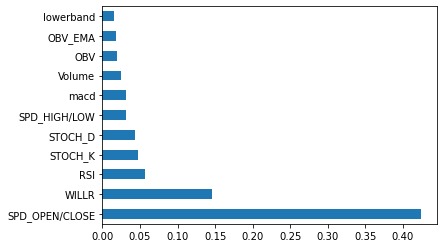

In [329]:
feat_importances_NASDAQ = pd.Series(rf_NASDAQ.feature_importances_, index=X_train_NASDAQ.columns)
feat_importances_NASDAQ.nlargest(11).plot(kind="barh")

In [330]:
NASDAQ_2=NASDAQ.copy()

In [331]:
#add columns to NASDAQ_2 from all variables
NASDAQ_2 = NASDAQ_2[["AdjClose", "SPD_OPEN/CLOSE", "WILLR", "RSI", "direction"]]
train_size = int(0.70 * len(NASDAQ_2))
NASDAQ_train = NASDAQ_2.iloc[:train_size]
NASDAQ_test = NASDAQ_2.iloc[train_size:]

In [426]:

from sklearn import preprocessing
from collections import deque
import random
from sklearn.preprocessing import StandardScaler


#pd.options.mode.chained_assignment = None
def preprocess_feature_df(df):
    for col in df.columns:
        if col != 'direction':
            df[col] = (df[col].values - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
            df.dropna(inplace=True)
            preprocessing.scale(df[col].values)
    #df = df.dropna()
    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(
        maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
            sequential_data.append([np.array(prev_days), i[-1]])
    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    return np.array(X), np.array(y)  # return X and y...and make X a numpy array!


In [430]:

train_x_NASDAQ, train_y_NASDAQ = preprocess_feature_df(NASDAQ_train)
validation_x_NASDAQ, validation_y_NASDAQ = preprocess_feature_df(NASDAQ_test)

<ipython-input-426-87d4165b36bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col].values - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
<ipython-input-426-87d4165b36bb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-426-87d4165b36bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [334]:
train_y_NASDAQ=np.where(train_y_NASDAQ==1,1,0)
validation_y_NASDAQ=np.where(validation_y_NASDAQ==1,1,0)

In [431]:
len(train_x_NASDAQ)

3858

In [335]:

import time

EPOCHS = 30
BATCH_SIZE = 24
NAME = f"{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}-NASDAQ"

In [336]:
model_NASDAQ = Sequential()
model_NASDAQ.add(CuDNNLSTM(256, input_shape=train_x_NASDAQ.shape[1:], recurrent_regularizer=regularizers.l2(0.01),
               return_sequences=True))  #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_NASDAQ.add(Dropout(0.2))
model_NASDAQ.add(BatchNormalization())

model_NASDAQ.add(CuDNNLSTM(128, input_shape=train_x_NASDAQ.shape[1:], kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01),
               ))  #recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_NASDAQ.add(Dropout(0.2))
model_NASDAQ.add(BatchNormalization())


model_NASDAQ.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-4, decay=1e-6)
# Compile model_NASDAQ
model_NASDAQ.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [338]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
from keras.callbacks import LearningRateScheduler

filepath = "KERAS_NASDQAQ-{epoch:02d}-{val_accuracy:.3f}"  # unique file name that will include the epoch and the validation acc for that epoch
  # saves only the best ones


def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''

    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch / step_size))

    return LearningRateScheduler(schedule)


lr_sched = step_decay_schedule(initial_lr=1e-2, decay_factor=0.75, step_size=2)
history_NASDAQ = model_NASDAQ.fit(
    train_x_NASDAQ, train_y_NASDAQ,
    batch_size=24,
    epochs=1000,
    validation_data=(validation_x_NASDAQ, validation_y_NASDAQ),
 callbacks=[es])
#model_NASDAQ.save("model_NASDAQs/{}".format(NAME))
#divide NASDAQ test into x and y

Epoch 1/1000
161/161 [==============================] - 8s 35ms/step - loss: 6.9696 - accuracy: 0.5158 - val_loss: 5.9267 - val_accuracy: 0.5671
Epoch 2/1000
161/161 [==============================] - 5s 31ms/step - loss: 5.3324 - accuracy: 0.5270 - val_loss: 4.6549 - val_accuracy: 0.5671
Epoch 3/1000
161/161 [==============================] - 5s 31ms/step - loss: 4.2744 - accuracy: 0.5420 - val_loss: 3.8124 - val_accuracy: 0.5774
Epoch 4/1000
161/161 [==============================] - 5s 32ms/step - loss: 3.5571 - accuracy: 0.5544 - val_loss: 3.2134 - val_accuracy: 0.6005
Epoch 5/1000
161/161 [==============================] - 5s 32ms/step - loss: 3.0557 - accuracy: 0.5513 - val_loss: 2.7793 - val_accuracy: 0.6151
Epoch 6/1000
161/161 [==============================] - 5s 32ms/step - loss: 2.6855 - accuracy: 0.5498 - val_loss: 2.5030 - val_accuracy: 0.5908
Epoch 7/1000
161/161 [==============================] - 5s 33ms/step - loss: 2.4069 - accuracy: 0.5435 - val_loss: 2.2114 - val_ac

161/161 [==============================] - 5s 33ms/step - loss: 0.3781 - accuracy: 0.8870 - val_loss: 0.5933 - val_accuracy: 0.8166
Epoch 58/1000
161/161 [==============================] - 7s 41ms/step - loss: 0.3721 - accuracy: 0.8924 - val_loss: 0.4739 - val_accuracy: 0.8537
Epoch 59/1000
161/161 [==============================] - 6s 35ms/step - loss: 0.3668 - accuracy: 0.8901 - val_loss: 0.4473 - val_accuracy: 0.8652
Epoch 60/1000
161/161 [==============================] - 5s 32ms/step - loss: 0.3574 - accuracy: 0.8914 - val_loss: 0.3649 - val_accuracy: 0.8950
Epoch 61/1000
161/161 [==============================] - 5s 31ms/step - loss: 0.3554 - accuracy: 0.8919 - val_loss: 0.3852 - val_accuracy: 0.8877
Epoch 62/1000
161/161 [==============================] - 5s 32ms/step - loss: 0.3507 - accuracy: 0.8976 - val_loss: 0.4087 - val_accuracy: 0.8810
Epoch 63/1000
161/161 [==============================] - 5s 32ms/step - loss: 0.3534 - accuracy: 0.8901 - val_loss: 0.4223 - val_accuracy:

161/161 [==============================] - 6s 35ms/step - loss: 0.2506 - accuracy: 0.9189 - val_loss: 0.3309 - val_accuracy: 0.8852
Epoch 114/1000
161/161 [==============================] - 5s 33ms/step - loss: 0.2526 - accuracy: 0.9145 - val_loss: 0.2655 - val_accuracy: 0.9071
Epoch 115/1000
161/161 [==============================] - 5s 34ms/step - loss: 0.2489 - accuracy: 0.9184 - val_loss: 0.3108 - val_accuracy: 0.8931
Epoch 116/1000
161/161 [==============================] - 6s 38ms/step - loss: 0.2671 - accuracy: 0.9098 - val_loss: 0.3024 - val_accuracy: 0.8877
Epoch 117/1000
161/161 [==============================] - 6s 35ms/step - loss: 0.2545 - accuracy: 0.9160 - val_loss: 0.2470 - val_accuracy: 0.9186
Epoch 118/1000
161/161 [==============================] - 6s 35ms/step - loss: 0.2475 - accuracy: 0.9176 - val_loss: 0.2439 - val_accuracy: 0.9114
Epoch 119/1000
161/161 [==============================] - 6s 36ms/step - loss: 0.2308 - accuracy: 0.9256 - val_loss: 0.2606 - val_acc

Epoch 169/1000
161/161 [==============================] - 5s 33ms/step - loss: 0.2023 - accuracy: 0.9326 - val_loss: 0.1639 - val_accuracy: 0.9526
Epoch 170/1000
161/161 [==============================] - 5s 34ms/step - loss: 0.2018 - accuracy: 0.9305 - val_loss: 0.1936 - val_accuracy: 0.9284
Epoch 171/1000
161/161 [==============================] - 5s 33ms/step - loss: 0.2116 - accuracy: 0.9292 - val_loss: 0.1818 - val_accuracy: 0.9369
Epoch 172/1000
161/161 [==============================] - 5s 33ms/step - loss: 0.2033 - accuracy: 0.9313 - val_loss: 0.1566 - val_accuracy: 0.9539
Epoch 173/1000
161/161 [==============================] - 5s 34ms/step - loss: 0.2047 - accuracy: 0.9277 - val_loss: 0.1914 - val_accuracy: 0.9314
Epoch 174/1000
161/161 [==============================] - 5s 34ms/step - loss: 0.2244 - accuracy: 0.9222 - val_loss: 0.2083 - val_accuracy: 0.9253
Epoch 175/1000
161/161 [==============================] - 5s 33ms/step - loss: 0.1975 - accuracy: 0.9349 - val_loss: 0

In [339]:

predicted_NASDAQ = model_NASDAQ.predict(validation_x_NASDAQ)
predicted_NASDAQ_train=model_NASDAQ.predict(train_x_NASDAQ)

In [418]:
score_NASDAQ = model_NASDAQ.evaluate(validation_x_NASDAQ, validation_y_NASDAQ, verbose = 0) 

print('Test loss:', score_NASDAQ[0]) 
print('Test accuracy:', score_NASDAQ[1])

Test loss: 0.2334538698196411
Test accuracy: 0.9143897891044617


In [344]:
predicted_NASDAQ_out = []
for i in predicted_NASDAQ:
    if i >= 0.5:
        predicted_NASDAQ_out.append(1)
    elif i < 0.5:
        predicted_NASDAQ_out.append(-1)

predicted_NASDAQ_out
predicted_NASDAQ_train=[]
for i in predicted_NASDAQ_train:
    if i >= 0.5:
        predicted_NASDAQ_train.append(1)
    elif i < 0.5:
        predicted_NASDAQ_train.append(-1) 

In [345]:
predicted_nasdaq_test=pd.DataFrame(predicted_NASDAQ_out)
predicted_nasdaq_train_out=pd.DataFrame(predicted_NASDAQ_train)
predicted_nasdaq_test.to_csv("test_LSTM_NASDAQ.csv")
predicted_nasdaq_train_out.to_csv("train_LSTM_NASDAQ.csv")

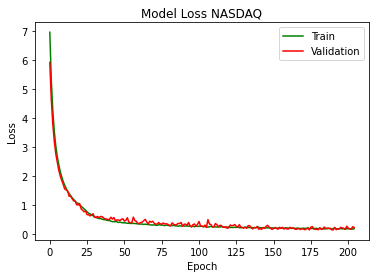

In [342]:
plt.plot(history_NASDAQ.history['loss'], color="green")
plt.plot(history_NASDAQ.history['val_loss'], color="red")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.title("Model Loss NASDAQ")
plt.savefig("MODELS_PNG/LOSS_NASDAQ.png")

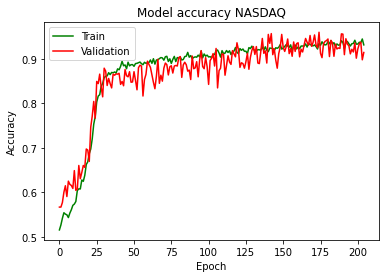

In [343]:

plt.plot(history_NASDAQ.history["accuracy"], color="green")
plt.plot(history_NASDAQ.history["val_accuracy"], color="red")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.title("Model accuracy NASDAQ")
plt.savefig("MODELS_PNG/Accuracy_NASDAQ.png")


## Gold

In [346]:
all_variables=["Date","Low","High", "Open", "AdjClose","Volume","RSI","TSF","SPD_OPEN/CLOSE","SPD_HIGH/LOW",
           "macd","OBV","OBV_EMA", "EMA","upperband","middleband","lowerband","MOM","STOCH_K", "STOCH_D","WILLR", "TEMA", "direction"]
GOLD = pd.read_csv("GLD.csv", usecols= all_variables)
#set date as datetime
GOLD["Date"] = pd.to_datetime(GOLD["Date"])

#set index to date
GOLD.set_index("Date", inplace=True)




In [347]:
STOCK_TO_PREDICT = "GOLD"

GOLD_2 = GOLD.copy()

#exclude direction column
X_gold = GOLD.drop(['direction', "AdjClose"], axis=1)
y_gold = GOLD["direction"]

y_GOLD=[]


In [348]:
for i in y_gold:
    if i ==-1:
        y_GOLD.append(0)
    else:
        y_GOLD.append(1)
y_gold=y_GOLD

In [349]:
"""X[col]=(X[col].values-np.min([col]))/(np.max(X[col])-np.min(X[col]))
    preprocessing.scale(X[col].values)
X.dropna(inplace=True)"""
for col in X_gold.columns:
    X_gold[col] = (X_gold[col].values - np.min(X_gold[col])) / (np.max(X_gold[col]) - np.min(X_gold[col]))
    preprocessing.scale(X_gold[col].values)



In [350]:
X_train_GOLD, X_valid_GOLD, y_train_GOLD, y_valid_GOLD = train_test_split(X_gold, y_gold, test_size=0.3, shuffle=False)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_GOLD = RandomForestClassifier(n_estimators=100,
                                   n_jobs=-1,
                                   random_state=42)

rf_GOLD.fit(X_train_GOLD, y_train_GOLD)
y_pred_GOLD = rf_GOLD.predict(X_valid_GOLD)

print('Score Train: ', rf_GOLD.score(X_train_GOLD, y_train_GOLD))
print('Score Test: ', rf_GOLD.score(X_valid_GOLD, y_valid_GOLD))


In [352]:
feature_importances_GOLD = pd.DataFrame(rf_GOLD.feature_importances_, index=X_train_GOLD.columns,
                                          columns=['importance']).sort_values(
    'importance', ascending=False)
feature_importances_GOLD

,importance
SPD_OPEN/CLOSE,0.300715
WILLR,0.152185
RSI,0.069968
STOCH_D,0.063283
STOCH_K,0.061681
SPD_HIGH/LOW,0.038749
macd,0.037761
Volume,0.032711
OBV,0.027361
OBV_EMA,0.027144


<AxesSubplot:>

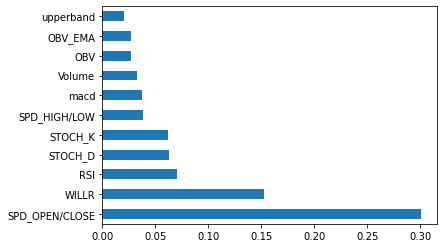

In [353]:
feat_importances_GOLD = pd.Series(rf_GOLD.feature_importances_, index=X_train_GOLD.columns)
feat_importances_GOLD.nlargest(11).plot(kind="barh")
#add columns to GOLD_2 from all variables

In [354]:
GOLD_2 = GOLD_2[["AdjClose", "SPD_OPEN/CLOSE", "WILLR", "STOCH_D","STOCH_K", "RSI", "direction"]]
train_size = int(0.70 * len(GOLD_2))
GOLD_train = GOLD_2.iloc[:train_size]
GOLD_test = GOLD_2.iloc[train_size:]
GOLD_train

,AdjClose,SPD_OPEN/CLOSE,WILLR,STOCH_D,STOCH_K,RSI,direction
Date,,,,,,,
2000-10-23,270.100006,-1.600006,-100.000000,8.757263,5.820149,45.130560,-1
2000-10-24,270.100006,0.300018,-100.000000,7.321651,5.820149,45.130560,1
2000-10-25,266.200012,0.000000,-109.677367,2.804836,-3.225789,37.567697,-1
2000-10-26,264.899994,-1.100006,-122.340504,-2.692755,-10.672624,35.435977,-1
2000-10-27,264.399994,-1.100006,-110.091804,-9.311657,-14.036558,34.622255,-1
...,...,...,...,...,...,...,...
2015-10-07,1149.000000,1.400024,-18.699240,59.220253,69.467005,58.717960,1
2015-10-08,1144.699951,2.000000,-30.352482,69.468048,75.429039,56.515821,-1
2015-10-09,1156.300049,4.700073,-2.355767,75.920071,82.864170,60.788145,1


In [355]:

from sklearn import preprocessing
from collections import deque
import random
from sklearn.preprocessing import StandardScaler


#pd.options.mode.chained_assignment = None
def preprocess_feature_df(df):
    for col in df.columns:
        if col != 'direction':
            df[col] = (df[col].values - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
            df.dropna(inplace=True)
            preprocessing.scale(df[col].values)
    df = df.dropna()
    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(
        maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
            sequential_data.append([np.array(prev_days), i[-1]])
    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    return np.array(X), np.array(y)  # return X and y...and make X a numpy array!


In [356]:

train_x_GOLD, train_y_GOLD = preprocess_feature_df(GOLD_train)
validation_x_GOLD, validation_y_GOLD = preprocess_feature_df(GOLD_test)

<ipython-input-355-bb49afece209>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col].values - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
<ipython-input-355-bb49afece209>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-355-bb49afece209>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

<ipython-input-355-bb49afece209>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col].values - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
<ipython-input-355-bb49afece209>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [357]:
train_y_GOLD=np.where(train_y_GOLD==1,1,0)
validation_y_GOLD=np.where(validation_y_GOLD==1,1,0)

In [358]:

import time

EPOCHS = 30
BATCH_SIZE = 24
NAME = f"{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}-GOLD"

In [359]:
model_GOLD = Sequential()
model_GOLD.add(CuDNNLSTM(256, input_shape=train_x_GOLD.shape[1:], recurrent_regularizer=regularizers.l2(0.01),
               return_sequences=True))  #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_GOLD.add(Dropout(0.2))
model_GOLD.add(BatchNormalization())

model_GOLD.add(CuDNNLSTM(128, input_shape=train_x_GOLD.shape[1:], kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01),
               ))  #recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_GOLD.add(Dropout(0.2))
model_GOLD.add(BatchNormalization())


model_GOLD.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-4, decay=1e-6)
# Compile model_GOLD
model_GOLD.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [361]:


def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''

    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch / step_size))

    return LearningRateScheduler(schedule)


lr_sched = step_decay_schedule(initial_lr=1e-2, decay_factor=0.75, step_size=2)
history_GOLD = model_GOLD.fit(
    train_x_GOLD, train_y_GOLD,
    batch_size=24,
    epochs=1000,
    validation_data=(validation_x_GOLD, validation_y_GOLD),
    callbacks=[es])

Epoch 1/1000
155/155 [==============================] - 7s 35ms/step - loss: 7.0351 - accuracy: 0.5069 - val_loss: 6.0217 - val_accuracy: 0.5342
Epoch 2/1000
155/155 [==============================] - 5s 31ms/step - loss: 5.4475 - accuracy: 0.5034 - val_loss: 4.7708 - val_accuracy: 0.5392
Epoch 3/1000
155/155 [==============================] - 5s 31ms/step - loss: 4.3968 - accuracy: 0.5290 - val_loss: 3.9313 - val_accuracy: 0.5373
Epoch 4/1000
155/155 [==============================] - 5s 32ms/step - loss: 3.6788 - accuracy: 0.5353 - val_loss: 3.3305 - val_accuracy: 0.5551
Epoch 5/1000
155/155 [==============================] - 5s 31ms/step - loss: 3.1582 - accuracy: 0.5317 - val_loss: 2.9270 - val_accuracy: 0.5342
Epoch 6/1000
155/155 [==============================] - 5s 33ms/step - loss: 2.7735 - accuracy: 0.5299 - val_loss: 2.6510 - val_accuracy: 0.5158
Epoch 7/1000
155/155 [==============================] - 5s 35ms/step - loss: 2.4690 - accuracy: 0.5466 - val_loss: 2.4396 - val_ac

155/155 [==============================] - 5s 33ms/step - loss: 0.3993 - accuracy: 0.8746 - val_loss: 0.3706 - val_accuracy: 0.8924
Epoch 58/1000
155/155 [==============================] - 5s 35ms/step - loss: 0.3974 - accuracy: 0.8771 - val_loss: 0.3786 - val_accuracy: 0.8829
Epoch 59/1000
155/155 [==============================] - 5s 34ms/step - loss: 0.3904 - accuracy: 0.8681 - val_loss: 0.3379 - val_accuracy: 0.9038
Epoch 60/1000
155/155 [==============================] - 6s 36ms/step - loss: 0.3891 - accuracy: 0.8768 - val_loss: 0.3597 - val_accuracy: 0.8886
Epoch 61/1000
155/155 [==============================] - 6s 36ms/step - loss: 0.3887 - accuracy: 0.8790 - val_loss: 0.4828 - val_accuracy: 0.8234
Epoch 62/1000
155/155 [==============================] - 5s 33ms/step - loss: 0.3831 - accuracy: 0.8762 - val_loss: 0.4476 - val_accuracy: 0.8361
Epoch 63/1000
155/155 [==============================] - 5s 33ms/step - loss: 0.3851 - accuracy: 0.8803 - val_loss: 0.3512 - val_accuracy:

155/155 [==============================] - 5s 33ms/step - loss: 0.2686 - accuracy: 0.9041 - val_loss: 0.2541 - val_accuracy: 0.9139
Epoch 114/1000
155/155 [==============================] - 5s 34ms/step - loss: 0.2623 - accuracy: 0.9135 - val_loss: 0.3302 - val_accuracy: 0.8627
Epoch 115/1000
155/155 [==============================] - 6s 37ms/step - loss: 0.2691 - accuracy: 0.9081 - val_loss: 0.2206 - val_accuracy: 0.9373
Epoch 116/1000
155/155 [==============================] - 5s 35ms/step - loss: 0.2640 - accuracy: 0.9065 - val_loss: 0.3124 - val_accuracy: 0.8703
Epoch 117/1000
155/155 [==============================] - 5s 35ms/step - loss: 0.2541 - accuracy: 0.9068 - val_loss: 0.3367 - val_accuracy: 0.8671
Epoch 118/1000
155/155 [==============================] - 6s 37ms/step - loss: 0.2544 - accuracy: 0.9138 - val_loss: 0.2899 - val_accuracy: 0.8810
Epoch 119/1000
155/155 [==============================] - 6s 36ms/step - loss: 0.2675 - accuracy: 0.9073 - val_loss: 0.2254 - val_acc

In [414]:
score_GOLD = model_GOLD.evaluate(validation_x_GOLD, validation_y_GOLD, verbose = 0) 

print('Test loss:', score_GOLD[0]) 
print('Test accuracy:', score_GOLD[1])

Test loss: 0.3469737470149994
Test accuracy: 0.8487342000007629


In [367]:

predicted_GOLD = model_GOLD.predict(validation_x_GOLD)
predicted_GOLD_train=model_GOLD.predict(train_x_GOLD)

Evaluation on **TEST SET**

In [373]:
predicted_GOLD_out_test = []
for i in predicted_GOLD:
    if i >= 0.5:
        predicted_GOLD_out_test.append(1)
    elif i < 0.5:
        predicted_GOLD_out_test.append(-1)


predicted_gold_out_train=[]
for i in predicted_GOLD_train:
    if i >= 0.5:
        predicted_gold_out_train.append(1)
    elif i < 0.5:
        predicted_gold_out_train.append(-1)


In [375]:
predicted_gold_test=pd.DataFrame(predicted_GOLD_out_test)
predicted_gold_train_out=pd.DataFrame(predicted_gold_out_train)
predicted_gold_test.to_csv("test_LSTM_GOLD.csv")
predicted_gold_train_out.to_csv("train_LSTM_GOLD.csv")

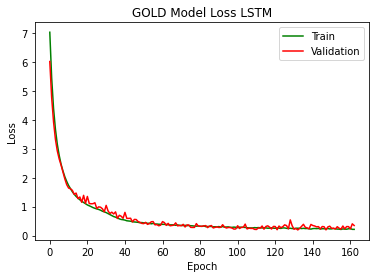

In [365]:
plt.plot(history_GOLD.history['loss'], color="green")
plt.plot(history_GOLD.history['val_loss'], color="red")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.title("GOLD Model Loss LSTM")

plt.savefig("GOLD_LSTM_Loss.jpg")



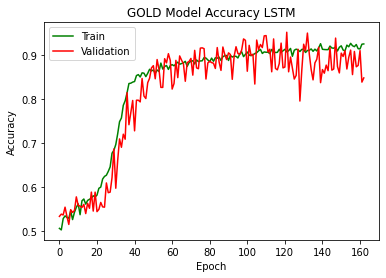

In [442]:
plt.plot(history_GOLD.history["accuracy"], color="green")
plt.plot(history_GOLD.history["val_accuracy"], color="red")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.title("GOLD Model Accuracy LSTM")
plt.savefig("GOLD_LSTM_Accuracy.jpg")

## WTI

In [178]:
WTI = pd.read_csv("WTI.csv", usecols=all_variables)
#set date as datetime
WTI["Date"] = pd.to_datetime(WTI["Date"])

#set index to date
WTI.set_index("Date", inplace=True)




In [179]:
STOCK_TO_PREDICT = "WTI"

WTI_2 = WTI.copy()

In [180]:

#exclude direction column
X_wti = WTI.drop(['direction', "AdjClose"], axis=1)
y_wti=WTI["direction"]
y_wti

Date
2000-10-12    1
2000-10-13   -1
2000-10-16   -1
2000-10-17   -1
2000-10-18    1
             ..
2022-02-07   -1
2022-02-08   -1
2022-02-09    1
2022-02-10    1
2022-02-11    1
Name: direction, Length: 5357, dtype: int64

In [181]:
"""X[col]=(X[col].values-np.min([col]))/(np.max(X[col])-np.min(X[col]))
    preprocessing.scale(X[col].values)
X.dropna(inplace=True)"""
for col in X_wti.columns:
    X_wti[col] = (X_wti[col].values - np.min(X_wti[col])) / (np.max(X_wti[col]) - np.min(X_wti[col]))
    preprocessing.scale(X_wti[col].values)

X_wti

,Open,High,Low,Volume,SPD_OPEN/CLOSE,SPD_HIGH/LOW,macd,RSI,OBV,OBV_EMA,TSF,WILLR,STOCH_K,STOCH_D,EMA,TEMA,upperband,middleband,lowerband,MOM
Date,,,,,,,,,,,,,,,,,,,,
2000-10-12,0.307808,0.174502,0.409284,0.050855,0.711352,0.037489,0.675511,0.747265,0.129249,0.006753,0.229582,0.974865,0.881685,0.799298,0.284955,0.013172,0.133296,0.138151,0.271580,0.403072
2000-10-13,0.313650,0.166717,0.409829,0.000000,0.686405,0.017885,0.686807,0.676686,0.129249,0.006787,0.235288,0.945541,0.904939,0.862950,0.287043,0.013543,0.134108,0.138520,0.271473,0.397332
2000-10-16,0.304039,0.158033,0.397842,0.026394,0.681114,0.035770,0.684834,0.565075,0.128415,0.006784,0.236240,0.891081,0.871129,0.888516,0.281712,0.012610,0.131794,0.137452,0.271751,0.386672
2000-10-17,0.293360,0.148301,0.396208,0.033810,0.700643,0.018573,0.682368,0.557211,0.127346,0.006737,0.236528,0.886892,0.808772,0.863706,0.278556,0.012079,0.127524,0.135926,0.273042,0.385852
2000-10-18,0.298700,0.150921,0.400022,0.023317,0.697493,0.012554,0.683661,0.588619,0.128083,0.006722,0.236209,0.903649,0.779079,0.820878,0.278940,0.012143,0.123799,0.134780,0.274492,0.389132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,0.664740,0.591705,0.714013,0.217528,0.691193,0.034050,0.913102,0.839181,0.985845,0.994737,0.629834,0.958925,0.958508,0.964882,0.655111,0.250964,0.559777,0.567237,0.625826,0.704953
2022-02-08,0.663610,0.583845,0.701918,0.204257,0.668767,0.054170,0.902173,0.733941,0.979388,0.995991,0.632362,0.915407,0.902140,0.944569,0.649670,0.244078,0.559641,0.571299,0.633046,0.694238
2022-02-09,0.652428,0.575610,0.701373,0.194744,0.694973,0.036973,0.892685,0.742665,0.985544,0.997282,0.634864,0.922068,0.860435,0.910066,0.647930,0.241903,0.557146,0.575738,0.643111,0.695878


In [182]:
X_train_WTI, X_valid_WTI, y_train_WTI, y_valid_WTI = train_test_split(X_wti, y_wti, test_size=0.3, shuffle=False)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_WTI = RandomForestClassifier(n_estimators=100,
                                 n_jobs=-1,
                                 random_state=42)

rf_WTI.fit(X_train_WTI, y_train_WTI)
y_pred_WTI = rf_WTI.predict(X_valid_WTI)

print('Score Train: ', rf_WTI.score(X_train_WTI, y_train_WTI))
print('Score Test: ', rf_WTI.score(X_valid_WTI, y_valid_WTI))

feature_importances_WTI = pd.DataFrame(rf_WTI.feature_importances_, index=X_train_WTI.columns,
                                        columns=['importance']).sort_values(
    'importance', ascending=False)
feature_importances_WTI

<AxesSubplot:>

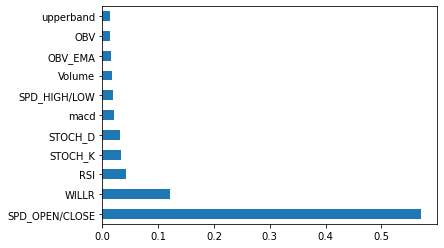

In [184]:
feat_importances_WTI = pd.Series(rf_WTI.feature_importances_, index=X_train_WTI.columns)
feat_importances_WTI.nlargest(11).plot(kind="barh")

In [185]:
#add columns to WTI_2 from all variables
WTI_2 = WTI_2[["AdjClose", "SPD_OPEN/CLOSE", "WILLR","RSI", "direction"]]
train_size = int(0.70 * len(WTI_2))
WTI_train = WTI_2.iloc[:train_size]
WTI_test = WTI_2.iloc[train_size:]

In [186]:
WTI_train

,AdjClose,SPD_OPEN/CLOSE,WILLR,RSI,direction
Date,,,,,
2000-10-12,36.099998,1.099998,-14.876069,64.484941,1
2000-10-13,35.049999,-0.880001,-32.231427,59.255621,-1
2000-10-16,33.099998,-1.300004,-64.462854,50.986282,-1
2000-10-17,32.950001,0.250000,-66.942143,50.403593,-1
2000-10-18,33.549999,0.000000,-57.024819,52.730684,1
...,...,...,...,...,...
2015-09-17,46.900002,-0.229999,-55.733932,55.026189,-1
2015-09-18,44.680000,-2.209999,-106.651398,48.598554,-1
2015-09-21,46.680000,1.709999,-56.153849,53.830881,1


In [252]:
SEQ_LEN_2 = 14 # how long of a preceeding sequence to collect for RNN
FUTURE_PERIOD_PREDICT = 1  # how far into the future are we trying to predict?

In [253]:

from sklearn import preprocessing
from collections import deque
import random
from sklearn.preprocessing import StandardScaler


#pd.options.mode.chained_assignment = None
def preprocess_feature_df(df):
    for col in df.columns:
        if col != 'target':
            df[col] = (df[col].values - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
            df.dropna(inplace=True)
            preprocessing.scale(df[col].values)
    df = df.dropna()
    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(
        maxlen=SEQ_LEN_2)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN_2:  # make sure we have 60 sequences!
            sequential_data.append([np.array(prev_days), i[-1]])
    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    return np.array(X), np.array(y)  # return X and y...and make X a numpy array!


In [254]:

train_x_WTI, train_y_WTI = preprocess_feature_df(WTI_train)
validation_x_WTI, validation_y_WTI = preprocess_feature_df(WTI_test)

<ipython-input-253-4b0c34be7315>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col].values - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
<ipython-input-253-4b0c34be7315>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-253-4b0c34be7315>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [255]:
import time

EPOCHS = 30
BATCH_SIZE = 24
NAME = f"{SEQ_LEN_2}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}-WTI"

In [256]:
train_y_WTI=np.where(train_y_WTI==1,1,0)
validation_y_WTI=np.where(validation_y_WTI==1,1,0)

In [265]:
model_WTI = Sequential()
model_WTI.add(CuDNNLSTM(256, input_shape=train_x_WTI.shape[1:],kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
               #return_sequences=True))  #kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_WTI.add(Dropout(0.5))
model_WTI.add(BatchNormalization())

"""model_WTI.add(CuDNNLSTM(128, input_shape=train_x_WTI.shape[1:]
               ))  #recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_WTI.add(Dropout(0.5))
model_WTI.add(BatchNormalization())
model_WTI.add(Dense(32, activation='relu'))"""

model_WTI.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
SGD=tf.keras.optimizers.SGD(learning_rate= 1e-2, decay=1e-6)
# Compile model_WTI
model_WTI.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [266]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
from keras.callbacks import LearningRateScheduler

filepath = "KERAS_WTI-{epoch:02d}-{val_accuracy:.3f}"  # unique file name that will include the epoch and the validation acc for that epoch
"""checkpoint = model_WTICheckpoint(
    "model_WTIs/{}.model_WTI".format(filepath, monitor='val_acc', verbose=1, mode='max', save_best_only=True, ),
    period=20)"""  # saves only the best ones


def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''

    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch / step_size))

    return LearningRateScheduler(schedule)


lr_sched = step_decay_schedule(initial_lr=1e-2, decay_factor=0.75, step_size=2)

history_WTI = model_WTI.fit(
    train_x_WTI, train_y_WTI,
    batch_size=24,
    epochs=1000,
    validation_data=(validation_x_WTI, validation_y_WTI),
callbacks=[es])
#model_WTI.save("model_WTIs/{}".format(NAME))
#divide WTI test into x and y

Epoch 1/1000
156/156 [==============================] - 5s 23ms/step - loss: 0.8039 - accuracy: 0.5040 - val_loss: 0.6954 - val_accuracy: 0.5166
Epoch 2/1000
156/156 [==============================] - 3s 20ms/step - loss: 0.7748 - accuracy: 0.5179 - val_loss: 0.6965 - val_accuracy: 0.4696
Epoch 3/1000
156/156 [==============================] - 3s 20ms/step - loss: 0.7716 - accuracy: 0.5104 - val_loss: 0.6912 - val_accuracy: 0.5511
Epoch 4/1000
156/156 [==============================] - 3s 22ms/step - loss: 0.7627 - accuracy: 0.5107 - val_loss: 0.6866 - val_accuracy: 0.5524
Epoch 5/1000
156/156 [==============================] - 4s 22ms/step - loss: 0.7629 - accuracy: 0.5153 - val_loss: 0.6816 - val_accuracy: 0.5555
Epoch 6/1000
156/156 [==============================] - 4s 22ms/step - loss: 0.7536 - accuracy: 0.5284 - val_loss: 0.6786 - val_accuracy: 0.5687
Epoch 7/1000
156/156 [==============================] - 4s 23ms/step - loss: 0.7391 - accuracy: 0.5364 - val_loss: 0.6761 - val_ac

156/156 [==============================] - 3s 22ms/step - loss: 0.6252 - accuracy: 0.6499 - val_loss: 0.6319 - val_accuracy: 0.6401
Epoch 58/1000
156/156 [==============================] - 4s 22ms/step - loss: 0.6287 - accuracy: 0.6480 - val_loss: 0.6295 - val_accuracy: 0.6552
Epoch 59/1000
156/156 [==============================] - 3s 22ms/step - loss: 0.6159 - accuracy: 0.6657 - val_loss: 0.6256 - val_accuracy: 0.6715
Epoch 60/1000
156/156 [==============================] - 3s 22ms/step - loss: 0.6180 - accuracy: 0.6692 - val_loss: 0.6271 - val_accuracy: 0.6589
Epoch 61/1000
156/156 [==============================] - 3s 22ms/step - loss: 0.6210 - accuracy: 0.6662 - val_loss: 0.6254 - val_accuracy: 0.6589
Epoch 62/1000
156/156 [==============================] - 4s 23ms/step - loss: 0.6143 - accuracy: 0.6635 - val_loss: 0.6258 - val_accuracy: 0.6520
Epoch 63/1000
156/156 [==============================] - 3s 22ms/step - loss: 0.6150 - accuracy: 0.6566 - val_loss: 0.6246 - val_accuracy:

156/156 [==============================] - 4s 23ms/step - loss: 0.4338 - accuracy: 0.8287 - val_loss: 0.4849 - val_accuracy: 0.8821
Epoch 114/1000
156/156 [==============================] - 3s 22ms/step - loss: 0.4230 - accuracy: 0.8314 - val_loss: 0.4812 - val_accuracy: 0.8821
Epoch 115/1000
156/156 [==============================] - 4s 25ms/step - loss: 0.4181 - accuracy: 0.8413 - val_loss: 0.4774 - val_accuracy: 0.8734
Epoch 116/1000
156/156 [==============================] - 4s 22ms/step - loss: 0.4199 - accuracy: 0.8365 - val_loss: 0.4741 - val_accuracy: 0.8765
Epoch 117/1000
156/156 [==============================] - 3s 22ms/step - loss: 0.4060 - accuracy: 0.8482 - val_loss: 0.4740 - val_accuracy: 0.8282
Epoch 118/1000
156/156 [==============================] - 4s 24ms/step - loss: 0.4147 - accuracy: 0.8373 - val_loss: 0.4698 - val_accuracy: 0.8408
Epoch 119/1000
156/156 [==============================] - 4s 24ms/step - loss: 0.4105 - accuracy: 0.8311 - val_loss: 0.4655 - val_acc

Epoch 169/1000
156/156 [==============================] - 3s 22ms/step - loss: 0.2920 - accuracy: 0.8897 - val_loss: 0.4254 - val_accuracy: 0.7724
Epoch 170/1000
156/156 [==============================] - 4s 23ms/step - loss: 0.2990 - accuracy: 0.8782 - val_loss: 0.4203 - val_accuracy: 0.7755
Epoch 171/1000
156/156 [==============================] - 4s 23ms/step - loss: 0.2995 - accuracy: 0.8753 - val_loss: 0.4050 - val_accuracy: 0.7925
Epoch 172/1000
156/156 [==============================] - 3s 22ms/step - loss: 0.2878 - accuracy: 0.8854 - val_loss: 0.4023 - val_accuracy: 0.7944
Epoch 173/1000
156/156 [==============================] - 4s 23ms/step - loss: 0.2979 - accuracy: 0.8742 - val_loss: 0.4271 - val_accuracy: 0.7705
Epoch 174/1000
156/156 [==============================] - 4s 23ms/step - loss: 0.2934 - accuracy: 0.8903 - val_loss: 0.4276 - val_accuracy: 0.7693
Epoch 175/1000
156/156 [==============================] - 4s 25ms/step - loss: 0.2870 - accuracy: 0.8911 - val_loss: 0

In [415]:

predicted_WTI_test = model_WTI.predict(validation_x_WTI)

predicted_WTI_train=model_WTI.predict(train_x_WTI)

In [443]:
model_WTI.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_58 (CuDNNLSTM)   (None, 256)               268288    
                                                                 
 dropout_58 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_58 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_34 (Dense)            (None, 1)                 257       
                                                                 
Total params: 269,569
Trainable params: 269,057
Non-trainable params: 512
_________________________________________________________________


In [446]:
model_IBM.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_63 (CuDNNLSTM)   (None, 14, 256)           268288    
                                                                 
 dropout_63 (Dropout)        (None, 14, 256)           0         
                                                                 
 batch_normalization_63 (Bat  (None, 14, 256)          1024      
 chNormalization)                                                
                                                                 
 cu_dnnlstm_64 (CuDNNLSTM)   (None, 128)               197632    
                                                                 
 dropout_64 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_64 (Bat  (None, 128)              512       
 chNormalization)                                    

In [445]:
model_GOLD.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_67 (CuDNNLSTM)   (None, 14, 256)           270336    
                                                                 
 dropout_67 (Dropout)        (None, 14, 256)           0         
                                                                 
 batch_normalization_67 (Bat  (None, 14, 256)          1024      
 chNormalization)                                                
                                                                 
 cu_dnnlstm_68 (CuDNNLSTM)   (None, 128)               197632    
                                                                 
 dropout_68 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_68 (Bat  (None, 128)              512       
 chNormalization)                                    

In [448]:
model_NASDAQ.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_65 (CuDNNLSTM)   (None, 14, 256)           268288    
                                                                 
 dropout_65 (Dropout)        (None, 14, 256)           0         
                                                                 
 batch_normalization_65 (Bat  (None, 14, 256)          1024      
 chNormalization)                                                
                                                                 
 cu_dnnlstm_66 (CuDNNLSTM)   (None, 128)               197632    
                                                                 
 dropout_66 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_66 (Bat  (None, 128)              512       
 chNormalization)                                    

In [416]:
score_WTI = model_WTI.evaluate(validation_x_WTI, validation_y_WTI, verbose = 0) 

print('Test loss:', score_WTI[0]) 
print('Test accuracy:', score_WTI[1])

Test loss: 0.40214839577674866
Test accuracy: 0.7899686694145203


In [277]:
predicted_WTI_test_out = []
for i in predicted_WTI_test:
    if i >= 0.5:
        predicted_WTI_test_out.append(1)
    elif i < 0.5:
        predicted_WTI_test_out.append(-1)


predicted_WTI_train_out = []

for i in predicted_WTI_train:
    if i >= 0.5:
        predicted_WTI_train_out.append(1)
    elif i < 0.5:
        predicted_WTI_train_out.append(-1)


    

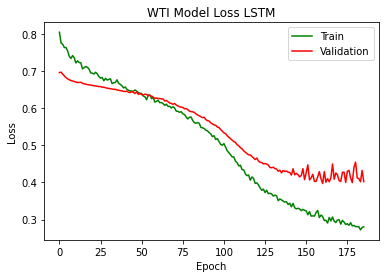

In [267]:
plt.plot(history_WTI.history['loss'], color="green")
plt.plot(history_WTI.history['val_loss'], color="red")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.title("WTI Model Loss LSTM")

plt.savefig("WTI_LSTM_Loss.jpg")

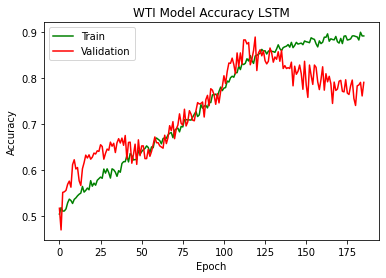

In [268]:
plt.plot(history_WTI.history["accuracy"], color="green")
plt.plot(history_WTI.history["val_accuracy"], color="red")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])
plt.title("WTI Model Accuracy LSTM")
plt.savefig("WTI_LSTM_Accuracy.jpg")